<a href="https://colab.research.google.com/github/josematez/DeepLearning_SkinCancer/blob/main/Testing_Data_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.15.4
!pip install deepdish
#!pip install tensorflow==1.15
#!pip install keras

     |████████████████████████████████| 13.9MB 247kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: astropy 4.1 has requirement numpy>=1.16, but you'll have numpy 1.15.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import deepdish as dd
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical, plot_model
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ReduceLROnPlateau

from keras.applications.vgg19 import VGG19

In [2]:
np.__version__

'1.15.4'

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/Data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = dd.io.load('ISIC_dataset.h5')
data_df = pd.DataFrame(data)

In [5]:
X_raw = data_df.image
Y = data_df.cell_type_idx

In [6]:
X = np.zeros((10015, 75, 100, 3))

for i in range(10015):
  X[i,:,:,:] = X_raw[i]

In [7]:
print("Tamaño datos X: {}".format(X.shape))
print("Tamaño datos Y: {}".format(Y.shape))

Tamaño datos X: (10015, 75, 100, 3)
Tamaño datos Y: (10015,)


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [9]:
X_train = (X_train / np.max(X_train))
X_test = (X_test / np.max(X_test))

In [10]:
Y_train = to_categorical(Y_train, num_classes = 7)
Y_test = to_categorical(Y_test, num_classes = 7)

In [11]:
input_shape = (75, 100, 3)
num_classes = 7

base_model = VGG19(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


80142336/80134624 [==============================] - 1s 0us/step


In [12]:
epocas = 20
bs = 64
lr = 0.0001
optim = Adam(learning_rate = lr)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
callbacks = [reduce_lr]

In [13]:
historico = model.fit(X_train, Y_train, epochs = epocas, batch_size = bs, validation_split = 0.2, callbacks = callbacks)

Epoch 1/20
101/101 [==============================] - 18s 182ms/step - loss: 0.9263 - accuracy: 0.6881 - val_loss: 0.7892 - val_accuracy: 0.6937
Epoch 2/20
101/101 [==============================] - 18s 177ms/step - loss: 0.7558 - accuracy: 0.7293 - val_loss: 0.7305 - val_accuracy: 0.7324
Epoch 3/20
101/101 [==============================] - 18s 181ms/step - loss: 0.6782 - accuracy: 0.7544 - val_loss: 0.7111 - val_accuracy: 0.7367
Epoch 4/20
101/101 [==============================] - 19s 186ms/step - loss: 0.6192 - accuracy: 0.7683 - val_loss: 0.7910 - val_accuracy: 0.7080
Epoch 5/20
101/101 [==============================] - 19s 192ms/step - loss: 0.5712 - accuracy: 0.7837 - val_loss: 0.8215 - val_accuracy: 0.7492
Epoch 6/20
101/101 [==============================] - 19s 189ms/step - loss: 0.5426 - accuracy: 0.8000 - val_loss: 0.6717 - val_accuracy: 0.7492
Epoch 7/20
101/101 [==============================] - 19s 185ms/step - loss: 0.4841 - accuracy: 0.8221 - val_loss: 0.5961 - val_ac

In [1]:
plt.plot(historico.history['accuracy'], c = 'b')
plt.plot(historico.history['val_accuracy'], c = 'r')
plt.legend(['Train', 'Validacion'])
plt.xlabel('Epocas')
plt.ylabel('Medida')
plt.title('Evolucion Entrenamiento')
plt.show()

NameError: name 'plt' is not defined

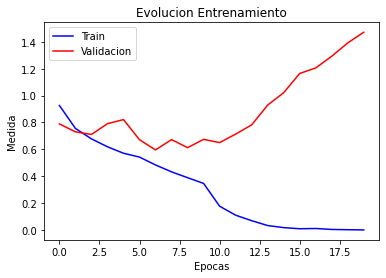

In [15]:
plt.plot(historico.history['loss'], c = 'b')
plt.plot(historico.history['val_loss'], c = 'r')
plt.legend(['Train', 'Validacion'])
plt.xlabel('Epocas')
plt.ylabel('Medida')
plt.title('Evolucion Entrenamiento')
plt.show()

In [16]:
metricas = model.evaluate(X_test, Y_test)

63/63 [==============================] - 2s 35ms/step - loss: 1.4374 - accuracy: 0.8163
